In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Periksa versi TensorFlow
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [2]:
import tensorflow as tf

# Mengunduh CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Melihat informasi dataset
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

# Normalisasi (opsional)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Kelas di CIFAR-10
classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]
print(f"Classes: {classes}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train shape: (50000, 32, 32, 3), y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3), y_test shape: (10000, 1)
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
# Membangun model CNN
model = tf.keras.Sequential([
    # Convolutional Layer 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Convolutional Layer 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Convolutional Layer 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten and Fully Connected Layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout untuk menghindari overfitting
    tf.keras.layers.Dense(10, activation='softmax')  # 10 kelas untuk output
])

# Menampilkan ringkasan model
model.summary()

# Compile the model 'model' before training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # This line is added to compile the model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Salin model pertama untuk membuat model_2
model_2 = tf.keras.models.clone_model(model)  # Salin model
model_2.build(input_shape=(None, 32, 32, 3))  # Menentukan bentuk input
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Melatih model pertama dengan 5 epoch
history_5 = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test)
)

# Melatih model kedua dengan 10 epoch
history_10 = model_2.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 79ms/step - accuracy: 0.2610 - loss: 1.9644 - val_accuracy: 0.4917 - val_loss: 1.3899
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.4854 - loss: 1.4177 - val_accuracy: 0.5729 - val_loss: 1.2000
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.5591 - loss: 1.2394 - val_accuracy: 0.6032 - val_loss: 1.1036
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.6057 - loss: 1.1231 - val_accuracy: 0.6308 - val_loss: 1.0297
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.6363 - loss: 1.0327 - val_accuracy: 0.6523 - val_loss: 0.9795
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 78ms/step - accuracy: 0.2729 - loss: 1.9217 - val_accuracy: 0.5174 - val_loss: 1.3340
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.5077 - loss: 1.3717 - val_accuracy: 0.5878 - val_loss: 1.1507
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 77ms/step - accuracy: 0.5828 - loss: 1.1874 - val_a

In [5]:
# Evaluasi model pertama (5 epoch)
loss_5, accuracy_5 = model.evaluate(x_test, y_test, verbose=0)
print(f"Model with 5 Epochs - Test Loss: {loss_5}")
print(f"Model with 5 Epochs - Test Accuracy: {accuracy_5}")

# Evaluasi model kedua (10 epoch)
loss_10, accuracy_10 = model_2.evaluate(x_test, y_test, verbose=0)
print(f"Model with 10 Epochs - Test Loss: {loss_10}")
print(f"Model with 10 Epochs - Test Accuracy: {accuracy_10}")

Model with 5 Epochs - Test Loss: 0.9794628620147705
Model with 5 Epochs - Test Accuracy: 0.6523000001907349
Model with 10 Epochs - Test Loss: 0.8234295845031738
Model with 10 Epochs - Test Accuracy: 0.7174999713897705


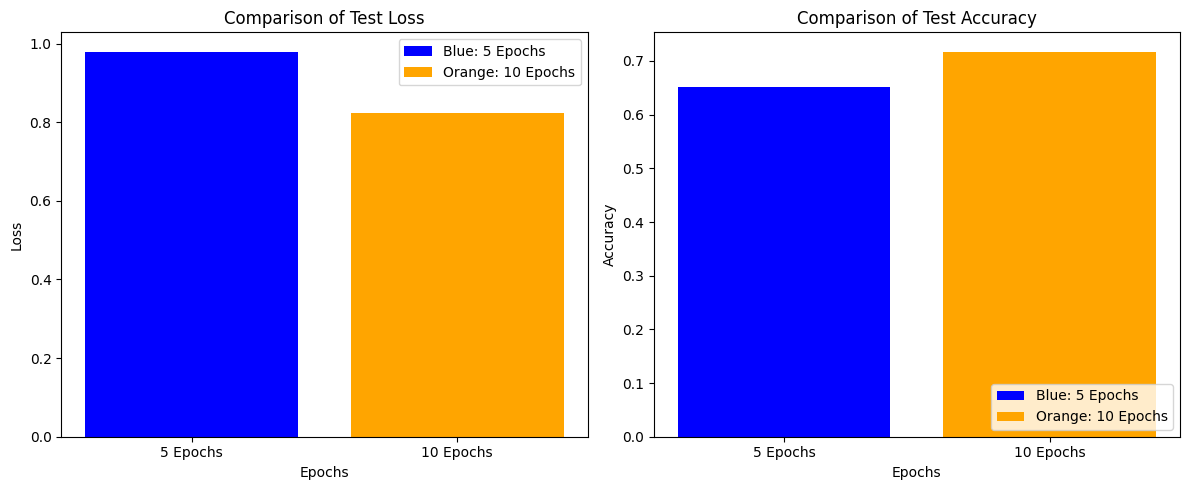

In [6]:
import matplotlib.pyplot as plt

# Data evaluasi
epochs = ['5 Epochs', '10 Epochs']
losses = [loss_5, loss_10]
accuracies = [accuracy_5, accuracy_10]

# Membuat grafik
plt.figure(figsize=(12, 5))

# Subplot untuk Loss
plt.subplot(1, 2, 1)
bars1 = plt.bar(epochs, losses, color=['blue', 'orange'])
plt.title('Comparison of Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
# Menambahkan keterangan warna
plt.legend(bars1, ['Blue: 5 Epochs', 'Orange: 10 Epochs'], loc='upper right')

# Subplot untuk Accuracy
plt.subplot(1, 2, 2)
bars2 = plt.bar(epochs, accuracies, color=['blue', 'orange'])
plt.title('Comparison of Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
# Menambahkan keterangan warna
plt.legend(bars2, ['Blue: 5 Epochs', 'Orange: 10 Epochs'], loc='lower right')

# Menampilkan grafik
plt.tight_layout()
plt.show()


In [7]:
# Menyimpan model dengan format baru
model.save('cifar10_cnn_model.keras')
print("Model saved as 'cifar10_cnn_model.keras'")


Model saved as 'cifar10_cnn_model.keras'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


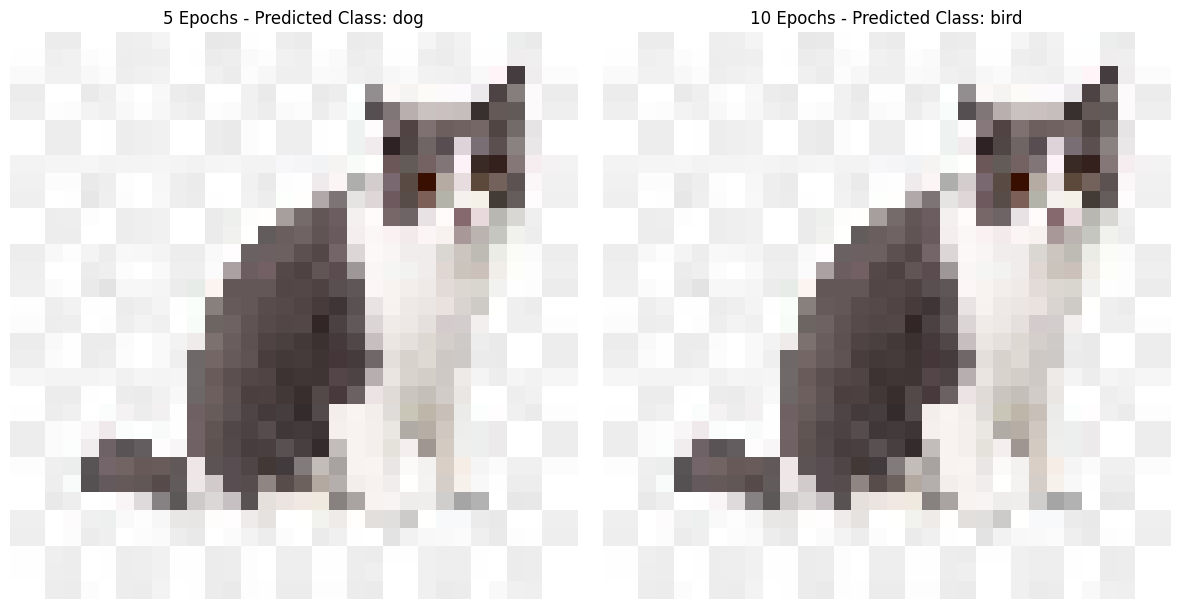

In [15]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array

# Ubah img_path ke path gambar yang benar
img_path = "/content/download.jpg"

# Periksa apakah file ada
if not os.path.exists(img_path):
    raise FileNotFoundError(f"File tidak ditemukan: {img_path}")

# Memuat dan memproses gambar
img = image.load_img(img_path, target_size=(32, 32))  # Ukuran gambar disesuaikan dengan model
img_array = image.img_to_array(img) / 255.0  # Normalisasi gambar ke rentang [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Menambah dimensi batch (model menerima input batch)

# Melakukan prediksi dengan model yang dilatih 5 Epochs
prediction_5 = model.predict(img_array)
predicted_class_5 = np.argmax(prediction_5, axis=1)
predicted_label_5 = classes[predicted_class_5[0]]

# Melakukan prediksi dengan model yang dilatih 10 Epochs
prediction_10 = model_2.predict(img_array)
predicted_class_10 = np.argmax(prediction_10, axis=1)
predicted_label_10 = classes[predicted_class_10[0]]

# Menampilkan hasil
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Gambar input (gambar yang sama untuk kedua model)
ax[0].imshow(img_array[0])  # Gambar yang telah diproses
ax[0].set_title(f"5 Epochs - Predicted Class: {predicted_label_5}")
ax[0].axis('off')  # Matikan axis untuk tampilan yang lebih bersih

ax[1].imshow(img_array[0])  # Gambar yang sama untuk kedua model
ax[1].set_title(f"10 Epochs - Predicted Class: {predicted_label_10}")
ax[1].axis('off')  # Matikan axis untuk tampilan yang lebih bersih

# Menampilkan plot
plt.tight_layout()
plt.show()
